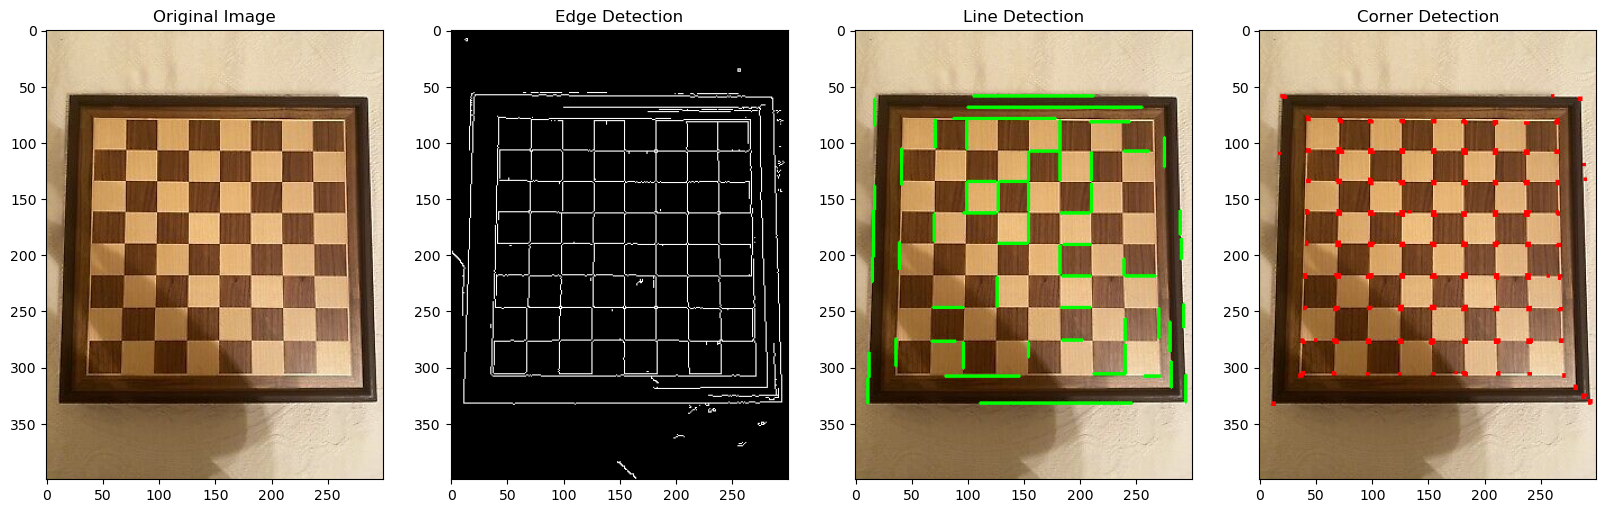

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('chessboard.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Edge Detection using Canny
edges = cv2.Canny(gray, 100, 200)

# Line Detection using Hough Transform
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, 100, 10)
line_image = np.copy(image)  # Make a copy of the original image to avoid modification during corner detection
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Corner Detection using Harris Corner Detection
corner_image = np.copy(image)  # Make a copy of the image for corner detection display
dst = cv2.cornerHarris(gray, 2, 3, 0.04)
dst = cv2.dilate(dst, None)
corner_image[dst > 0.01 * dst.max()] = [0, 0, 255]

# Display the results
plt.figure(figsize=(20, 10))

plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 4, 2)
plt.title('Edge Detection')
plt.imshow(edges, cmap='gray')

plt.subplot(1, 4, 3)
plt.title('Line Detection')
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 4, 4)
plt.title('Corner Detection')
plt.imshow(cv2.cvtColor(corner_image, cv2.COLOR_BGR2RGB))

plt.show()
